In [1]:
import pickle
import os

import torch
import torch.nn.functional as F
import numpy as np

from torch.utils.data import Dataset, DataLoader 
from tqdm import tqdm

from dataloader import *
import utils
import visualizer as visual

# Visualization
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
def create_dataset(n_nodes: int, env_type: str, trajectory_length: int, num_desired_trajectories: int, args = None, seed = 70, dump=False, dir=None, fname = None):

    utils.set_random_seed(seed)

    # Initialize the environment
    env = GraphEnv(
        n_items=n_nodes,                     # number of possible observations
        env=env_type, 
        batch_size=trajectory_length, 
        num_desired_trajectories=num_desired_trajectories, 
        device=None, 
        unique=True,                         # each state is assigned a unique observation if true
        args=args
    )

    # Generate datasets
    train_dataset = env.gen_dataset()
    test_dataset = env.gen_dataset()

    # Create dataloaders
    train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)
    test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)

    # If dump is True, save the datasets to a local file
    if dump:

        if dir is None:
            dir = os.getcwd()
        if not os.path.exists(dir):
            os.makedirs(dir)    

        if fname is None:
            fname = utils.generate_data_name(n_nodes, env_type, trajectory_length, num_desired_trajectories, args, seed)

        dump_path = os.path.join(dir, fname)

        metadata = {
            'n_nodes': n_nodes,
            'trajectory_length': trajectory_length,
            'num_desired_trajectories': num_desired_trajectories,
            'env_config': {
                'n_items': n_nodes,
                'env_type': env_type,
                'batch_size': trajectory_length,
                'num_desired_trajectories': num_desired_trajectories,
                'device': None,
                'unique': True,
                'args': args
            }
        }

        with open(dump_path, 'wb') as f:
            pickle.dump({
                'train_dataset': train_dataset,
                'test_dataset': test_dataset,
                'metadata': metadata,
            }, f)
        print(f"Datasets dumped to {dump_path}")

    return train_dataloader, test_dataloader, env

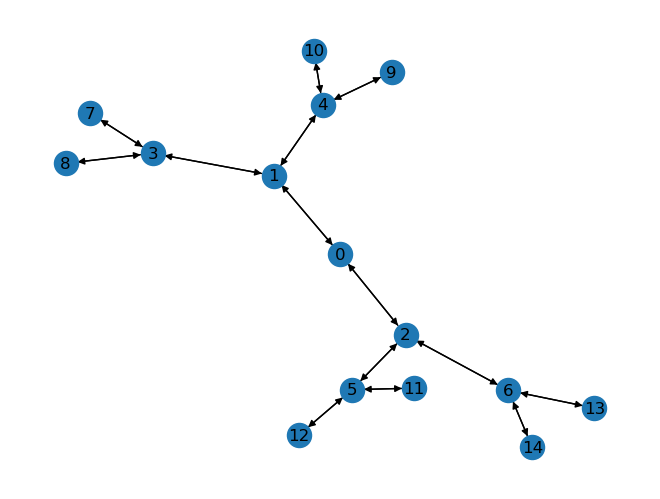

number of actions: 3
S-O mapping:
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
action-to-node:
{1: tensor([ 6, 13]), 2: tensor([ 6, 14]), 0: tensor([14,  6])}
node-to-action-matrix:
tensor([[-1,  1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [ 0, -1, -1,  1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [ 0, -1, -1, -1, -1,  1,  2, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1,  0, -1, -1, -1, -1, -1,  1,  2, -1, -1, -1, -1, -1, -1],
        [-1,  0, -1, -1, -1, -1, -1, -1, -1,  1,  2, -1, -1, -1, -1],
        [-1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,  2, -1, -1],
        [-1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  2],
        [-1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1,

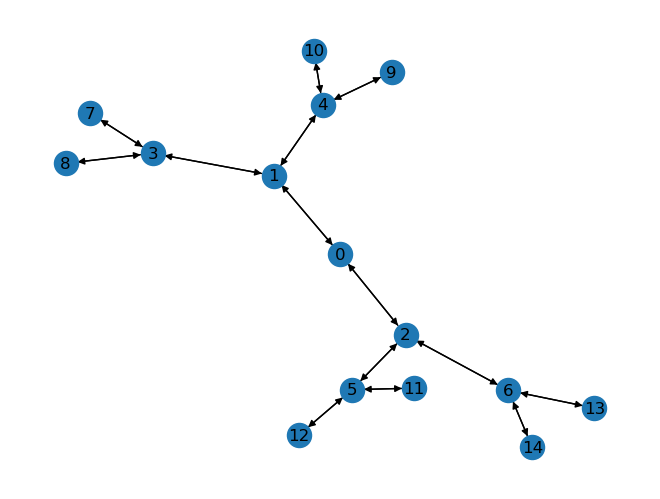

number of actions: 3
S-O mapping:
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
action-to-node:
{1: tensor([ 6, 13]), 2: tensor([ 6, 14]), 0: tensor([14,  6])}
node-to-action-matrix:
tensor([[-1,  1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [ 0, -1, -1,  1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [ 0, -1, -1, -1, -1,  1,  2, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1,  0, -1, -1, -1, -1, -1,  1,  2, -1, -1, -1, -1, -1, -1],
        [-1,  0, -1, -1, -1, -1, -1, -1, -1,  1,  2, -1, -1, -1, -1],
        [-1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,  2, -1, -1],
        [-1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  2],
        [-1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1,

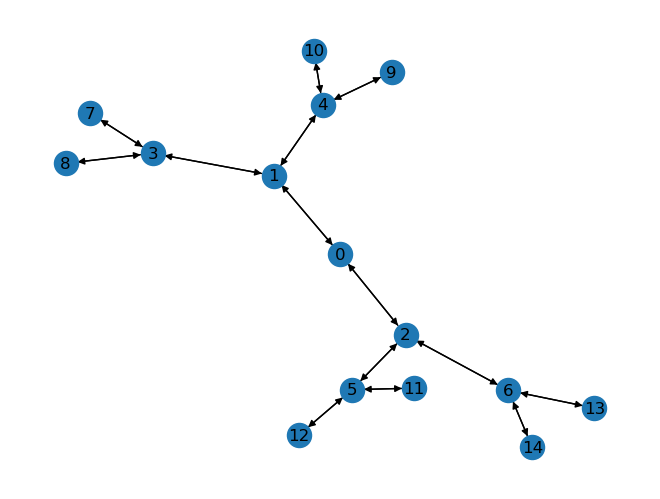

number of actions: 3
S-O mapping:
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
action-to-node:
{1: tensor([ 6, 13]), 2: tensor([ 6, 14]), 0: tensor([14,  6])}
node-to-action-matrix:
tensor([[-1,  1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [ 0, -1, -1,  1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [ 0, -1, -1, -1, -1,  1,  2, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1,  0, -1, -1, -1, -1, -1,  1,  2, -1, -1, -1, -1, -1, -1],
        [-1,  0, -1, -1, -1, -1, -1, -1, -1,  1,  2, -1, -1, -1, -1],
        [-1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,  2, -1, -1],
        [-1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  2],
        [-1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1,

In [9]:
vis = True

for seed in [65, 70, 75]:
    train, test, env = create_dataset(
        n_nodes=9,
        #env_type = 'grid',
        env_type = 'tree',
        trajectory_length=16,
        num_desired_trajectories=30,
        #args = {"rows": 4, "cols": 4},
        args = {"levels": 4},
        seed = seed, 
        dump = False,                             # set to True to dump to file
        dir = "./data",
        fname = None,                         # customize the file path
    )

    if vis:
        visual.visualize_env(env)
        for traj in train:
            print(f'Sample trajectory: of shape {traj[0].shape}')
            print(traj[0])
            break



    # env = GraphEnv( n_items=n_nodes,                     # number of possible observations
    #             env='tree', 
    #             batch_size=trajectory_length, 
    #             num_desired_trajectories=num_desired_trajectories, 
    #             device=None, 
    #             unique=True,                         # each state is assigned a unique observation if true
    #             args = {"levels": 4}
    #         )